This is a sentiment analysis program that parses the tweets fetched from twitter using Python

In [1]:
#importing the required libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [3]:
#get the dat
log = pd.read_csv('login.csv')

In [7]:
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [8]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, comsumerSecret)

#set the access token
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the api object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [9]:
#extract 100 tweet from the twitter user
posts = api.user_timeline(screen_name = "AndrewYNg", count = 100, lang = "en", tweet_mode = "extended")

#print last 5 tweet from this account
print("show the resent 5 tweets: ")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i+1

show the resent 5 tweets: 
1) Hoping this will more closely reflect ML application practice, and also spur innovative research on data-centric AI development. What do you think? (2/2)

2) Would love your feedback on this: AI Systems = Code (model/algorithm) + Data. Most academic benchmarks/competitions hold the Data fixed, and let teams work on the Code. Thinking of organizing something where we hold the Code fixed, and ask teams to work on the Data. (1/2)

3) @HiWoebot Congrats @alisonmdarcy and the @HiWoebot team on this incredible result! We need bots to be transparent about their identity and not pretend to be a human. Woebot's ability to form an emotional bond with people, while being honest and transparent, is exciting.

4) @HariAakashK @robert_crowe @DeepLearningAI_ Thanks @HariAakashK and congrats on finishing the first course so quickly!

5) Thrilled https://t.co/R0m407WZos’s Machine Learning Engineering for Production (MLOps) specialization is now available on Coursera! Learn

In [10]:
#create a dataframen with column tweet
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows
df.head()
df

,Tweets
0,Hoping this will more closely reflect ML appli...
1,Would love your feedback on this: AI Systems =...
2,@HiWoebot Congrats @alisonmdarcy and the @HiWo...
3,@HariAakashK @robert_crowe @DeepLearningAI_ Th...
4,Thrilled https://t.co/R0m407WZos’s Machine Lea...
...,...
95,I've listened to several of Shakira's songs ov...
96,Social distancing is needed to keep us safe. S...
97,One of the fastest-growing AI applications is ...
98,Many people are going through a hard time--anx...


In [11]:
#data cleaning
#create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text) #remove @mentions
  text = re.sub(r'#','',text) #remove '#' symbols
  text = re.sub(r'RT[\s]?:', '', text) #remove RT
  text = re.sub(r'https?:\/\/\S+','',text) #remove the hyperlinks

  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#show the clean text
df

,Tweets
0,Hoping this will more closely reflect ML appli...
1,Would love your feedback on this: AI Systems =...
2,Congrats and the team on this incredible re...
3,_crowe _ Thanks and congrats on finishing th...
4,Thrilled Machine Learning Engineering for Pro...
...,...
95,I've listened to several of Shakira's songs ov...
96,Social distancing is needed to keep us safe. S...
97,One of the fastest-growing AI applications is ...
98,Many people are going through a hard time--anx...


In [12]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new columns
df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe
df

,Tweets,subjectivity,polarity
0,Hoping this will more closely reflect ML appli...,0.750000,0.500000
1,Would love your feedback on this: AI Systems =...,0.300000,0.240000
2,Congrats and the team on this incredible re...,0.670000,0.380000
3,_crowe _ Thanks and congrats on finishing th...,0.344444,0.288889
4,Thrilled Machine Learning Engineering for Pro...,0.550000,0.550000
...,...,...,...
95,I've listened to several of Shakira's songs ov...,0.375000,0.234375
96,Social distancing is needed to keep us safe. S...,0.341667,0.258333
97,One of the fastest-growing AI applications is ...,0.651136,0.402841
98,Many people are going through a hard time--anx...,0.421667,0.148333


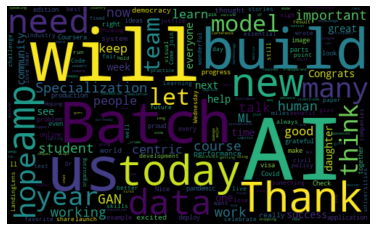

In [13]:
#ploting the word cloud
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
#create a function to compute positive, neutral and negative analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['polarity'].apply(getAnalysis)

df

,Tweets,subjectivity,polarity,Analysis
0,Hoping this will more closely reflect ML appli...,0.750000,0.500000,Positive
1,Would love your feedback on this: AI Systems =...,0.300000,0.240000,Positive
2,Congrats and the team on this incredible re...,0.670000,0.380000,Positive
3,_crowe _ Thanks and congrats on finishing th...,0.344444,0.288889,Positive
4,Thrilled Machine Learning Engineering for Pro...,0.550000,0.550000,Positive
...,...,...,...,...
95,I've listened to several of Shakira's songs ov...,0.375000,0.234375,Positive
96,Social distancing is needed to keep us safe. S...,0.341667,0.258333,Positive
97,One of the fastest-growing AI applications is ...,0.651136,0.402841,Positive
98,Many people are going through a hard time--anx...,0.421667,0.148333,Positive


In [15]:
#print all the positive tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) Hoping this will more closely reflect ML application practice, and also spur innovative research on data-centric AI development. What do you think? (2/2)

2) Would love your feedback on this: AI Systems = Code (model/algorithm) + Data. Most academic benchmarks/competitions hold the Data fixed, and let teams work on the Code. Thinking of organizing something where we hold the Code fixed, and ask teams to work on the Data. (1/2)

3)  Congrats  and the  team on this incredible result! We need bots to be transparent about their identity and not pretend to be a human. Woebot's ability to form an emotional bond with people, while being honest and transparent, is exciting.

4)  _crowe _ Thanks  and congrats on finishing the first course so quickly!

5) Thrilled  Machine Learning Engineering for Production (MLOps) specialization is now available on Coursera! Learn to build &amp; deploy AI systems that run in production, and develop your production-ready skills:   _crowe

6)  Brilliant point

In [16]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) We just reached the milestone of 10.0% of the U.S. receiving at least one vaccine shot! 🎉 We still have to stay vigilant, but here's to hoping for continued progress against Covid for all nations and to defeating the pandemic. 😷 

2) Democracy has taken a lot of damage recently. Last Wednesday was a nadir for the U.S., and the path back will be long and hard. But I believe the country has reached a turning point. Here're my thoughts on the role AI can play to support democracy. 

3) U.S. democracy is going through a dark day today with the Capitol building breached. But we will get through this, democracy will prevail, and we will learn from this  and strengthen our nation against future assaults. 🇺🇸

4)  That I'd look back a year later at every moment of this period with my daughter--including the sleepless parts, the messy and dirty parts, the frustrating parts, and the confusing parts--and feel incredibly grateful for this lovely experience. ❤️

5) Dismayed at  article's insultin

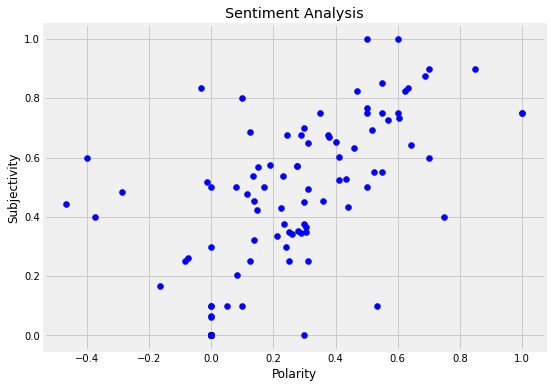

In [17]:
#ploting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['polarity'][i],df['subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
#get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

73.0

In [19]:
#get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100,1)

9.0

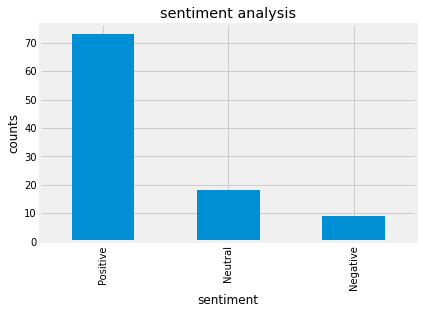

In [20]:
#show the value counts

df['Analysis'].value_counts()

#plot and visulize the counts
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()